<a id="home">Studi kasus di Praktikum ke-3 ini terdiri dari</a>
1. [Cari _hyperparameter_ yang pas untuk $K$-nearest neighbors ($K$-nn)](#part-i),
2. [Menggunakan _data augmentation_ untuk $K$-nearest neighbors ($K$-nn)](#part-ii)

# <a id="part-i">Part I: _Hyperparameter_ untuk $K$-Nearest Neighbors</a> (Back to [Home](#home))

Kita import semua library

In [19]:
import sklearn
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Kita import dataset MNIST ke variable `mnist.     
   
**Hint**: gunakan method `fetch_openml` dengan parameter sbb:
- `mnist_784`, 
- `as_frame` adalah `False`, dan 
- `parser` adalah `auto`.

In [20]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)


Assign masing-masing `mnist.data` dan `mnist.target` ke `X` dan `y`. 

In [21]:
X , y = mnist.data, mnist.target


Bagi `X` menjadi `X_train` dan `X_test` dengan pembagian sbb:
- `X_train` adalah `60000` instance pertama dan `X_test` adalah sisanya.

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [23]:
X.shape

(70000, 784)

In [24]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Kita import `numpy` dan $K$-nearest neighbors.

In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

Kita buat instance yang bernama `knn_clf` dari kelas `KNeighborsClassifier`.

In [26]:
knn_clf = KNeighborsClassifier()


Kita latih `knn_clf` dengan menggunakan `X_train` dan `y_train`.

In [27]:
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

Marilah kita hitung accuracy dari prediksi `knn_clf` pada `X_test` dan `y_test` dengan menggunakan method `score`.   
Simpanlah hasil `score` di variabel `baseline_accuracy`.

In [28]:
baseline_accuracy = knn_clf.score(X_test,y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Kita cetak akurasi model baseline ini.     
Model baseline ini menggunakan setting _hyperparameter_ yang _default_.

In [29]:
print(f"Akurasi di baseline adalah {baseline_accuracy}")

Akurasi di baseline adalah 0.9688


### Pertanyaan Refleksi
> _Berapakah akurasi model baseline yang diperoleh?_   
Jawaban :
97%

Selanjutnya kita akan improve akurasi model baseline ini dengan **Grid Search**.

Kita akan menggunakan grid search; oleh karena itu kita import `GridSearchCV`, yaitu pencarian _hyperparameter_ terbaik dengan _cross-validation_.

In [67]:
from sklearn.model_selection import GridSearchCV

Kita akan membuat nilai-nilai _hyperparameter_ yang akan diujicobakan sebagai berikut:
Buatlah _dictionary_ yang bernama `param_grid` dengan _key_-_values_ adalah 
- `weights` adalah `uniform` dan `distance`
- `n_neighbors` adalah `3`, `4`, `5`, `6`, dan `7`

In [68]:
param_grid = [{'weights':['uniform', 'distance'],
             'n_neighbors':[3,4,5,6,7]}]

Kembali kita buat `knn_clf` dari kelas `KNeighborsClassifier`. 

In [69]:
knn_clf = KNeighborsClassifier()


Kita buat instance yang bernama `grid_search` dari kelas `GridSearchCV` dengan parameter adalah
- `knn_clf`,
- `param_grifd` yang sudah dibuat, dan
- jumlah fold `cv` adalah `5`. 

In [70]:
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)

Kita akan menggunakan `grid_search` pada **10ribu** instance yang pertama dari `X_train` dan `y_train`.

In [71]:
grid_search.fit(X_train[:10000], y_train[:10000])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}])

Marilah kita cetak best _hyperparameter_ yang telah ditemukan.

In [72]:
print(grid_search.best_params_)

{'n_neighbors': 4, 'weights': 'distance'}


Kita cetak **best** _accuracy_ atau _score_ dari hasil `grid_search`. 

In [91]:
print(grid_search.best_score_)

0.9441999999999998


Latihlah model dengan **best** _hyperparameter_ pada `X_train` dan `y_train`. 

In [93]:
grid_search.best_estimator_.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

Kita hitung akurasi dari model dengan **best** _hyperparameter_ pada `X_test` dan `y_test`.    
Simpan hasil akurasi pada `tuned_accuracy`.

In [94]:
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

Marilah kita cetak akurasi model yang sudah di-_tuning_ ini.

In [95]:
print(f"Akurasi model yang sudah di-tuning adalah {tuned_accuracy * 100}%")

Akurasi model yang sudah di-tuning adalah 97.14%


### Pertanyaan Refleksi
> Apakah akurasi model yang sudah di-_tuning_ lebih tinggi daripada akurasi model dengan _hyperparameter default_?   
Jelaskan!

Di Studi kasus ini, hasil dari tuning (97.14%) lebih tinggi daripada akurasi model dengan hyperparameter default (96.88%)

Tidak selalu. Ada kemungkinan bahwa model dengan hyperparameter default 
dapat memiliki akurasi yang sama atau bahkan lebih tinggi daripada model yang 
sudah di-tuning. Hal ini tergantung pada jenis data yang digunakan 
kompleksitas model, dan jenis masalah yang ingin diselesaikan.

Secara umum, model yang sudah di-tuning cenderung memiliki performa
yang lebih baik daripada model dengan hyperparameter default karena 
hyperparameter yang diatur secara tepat dapat membantu model menyesuaikan
diri dengan data dengan lebih baik dan mengurangi risiko overfitting atau underfitting.

Namun, tuning hyperparameter adalah suatu proses yang bergantung pada waktu dan komputasi yang signifikan, dan terkadang bahkan jika akurasi meningkat, peningkatan tersebut tidak sebanding dengan biaya tuning. Oleh karena itu, dalam beberapa kasus, menggunakan hyperparameter default dapat menjadi pilihan yang lebih baik secara praktis.

# <a id="part-ii">Part II: _Data Augmentation_ untuk $K$-Nearest Neighbors</a> (Back to [Home](#home))

Kita import method `shift` yang akan digunakan untuk melakukan _shifting_ pada gambar.

In [81]:
from scipy.ndimage import shift

Kita buat fungsi `shift` yang akan digunakan untuk melakukan `shifting` pada gambar.

In [82]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

Kita demokan demokan penggunakan fungsi `shift_image` dengan _random digit_.

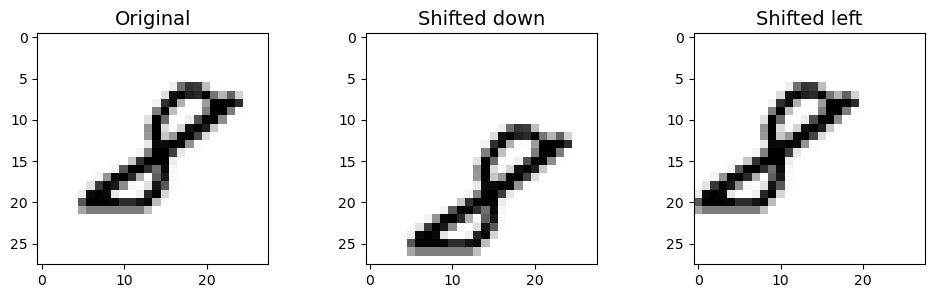

In [83]:
image = X_train[1009]  # random digit untuk demo

# Gambar di-shift atau digeser ke bawah sebanyak 5 piksel
shifted_image_down = shift_image(image, 0, 5)

# Gambar di-shift atau digeser ke kiri sebanyak 5 piksel
shifted_image_left = shift_image(image, -5, 0)

# Tampilkan hasil gambar yang sudah di-shift atau digeser
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

Selanjutnya, kita akan membuat dataset baru, yaitu   
    
$$ \text{Dataset baru} = \text{Dataset lama} + \text{Gambar-gambar yang sudah di-shift atau digeser} $$

Adapun _shifting_ atau pergeseran yang digunakan adalah 
- 1 piksel ke kiri,
- 1 piksel ke kanan,
- 1 piksel ke atas, dan
- 1 piksel ke bawah.

In [84]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

        
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

Kita akan acak semua _instance_ atau data yang ada di dataset baru.  

In [85]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

Kita buat _instance_ dari kelas `KNeighborsClassifier` dengan _best hyperparameter_ hasil dari `grid_search`.  

In [86]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

Kita latih `knn_clf` dengan dataset baru kita, yaitu: `X_train_augmented` dan `y_train_augmented`.

In [87]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

Hitunglah akurasi dari model `knn_clf` tersebut pada `X_test` dan `y_test`.

In [88]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

In [90]:
print(f"Akurasi model dengan data augmentation adalah {augmented_accuracy* 100}%")

Akurasi model dengan data augmentation adalah 97.63%


<center>
<h1>The End</h1>
</center>